# C318 - Machine Learning - Projeto

## 1. Importação de bibliotecas e frameworks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import preprocessing

## 2. Importação de informações sobre os dados

In [2]:
df = pd.read_csv('datasets/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 3. Exploração inicial de dados

### 3.1 Análise de Variáveis Categóricas e Numéricas (Gráficos de Barras e Histogramas)

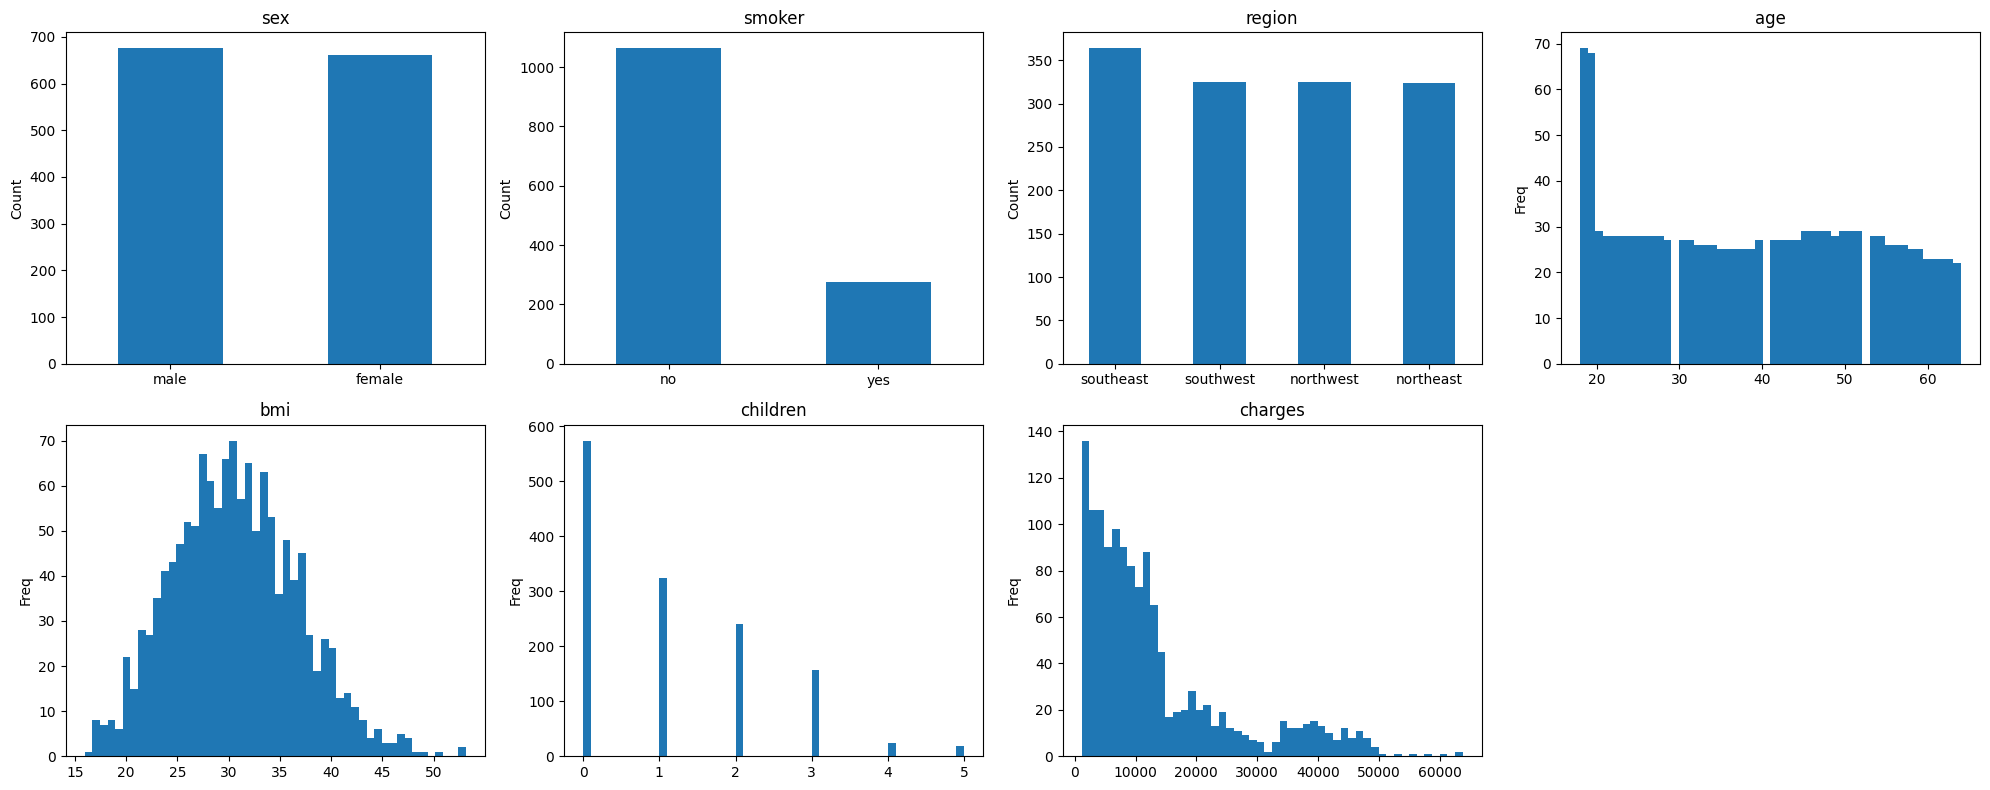

In [3]:
# Variáveis categóricas e numéricas
categorical_cols = ["sex", "smoker", "region"]
numerical_cols = df.select_dtypes(include='number').columns.tolist()

# Total de gráficos
total_plots = len(categorical_cols) + len(numerical_cols)

# Define grid de subplots
cols = 4
rows = (total_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Gráficos de barras para variáveis categóricas
for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i], rot=0)
    axes[i].set_title(col)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel('Count')

# Histogramas para variáveis numéricas
for j, col in enumerate(numerical_cols, start=len(categorical_cols)):
    df[col].plot(kind='hist', bins=50, ax=axes[j])
    axes[j].set_title(col)
    axes[j].set_xlabel(None)
    axes[j].set_ylabel('Freq')

# Remove subplots não usados (se sobrar espaço)
for k in range(total_plots, len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()


 - Sexo: Distribuição equilibrada entre homens (M) e mulheres (F).
 - Fumante: A maioria dos indivíduos não fuma. No entanto, existe uma parcela considerável de fumantes.
 - Região: As quatro regiões estão bem distribuídas, com leve predominância do sudeste.
 - Idade: Maior concentração de pessoas entre 18 e 20 anos. A frequência diminui com a idade.
 - IMC (bmi): Distribuição aproximadamente normal, com concentração entre 25 e 35. Há outliers com IMC acima de 50.
 - Filhos: A maioria tem de 0 a 2 filhos. Poucos têm 4 ou 5.
 - Gastos médicos (charges): A maioria dos valores está abaixo de 20 mil, mas há outliers com custos muito elevados (>60 mil).

### 3.2 Análise de Boxplots

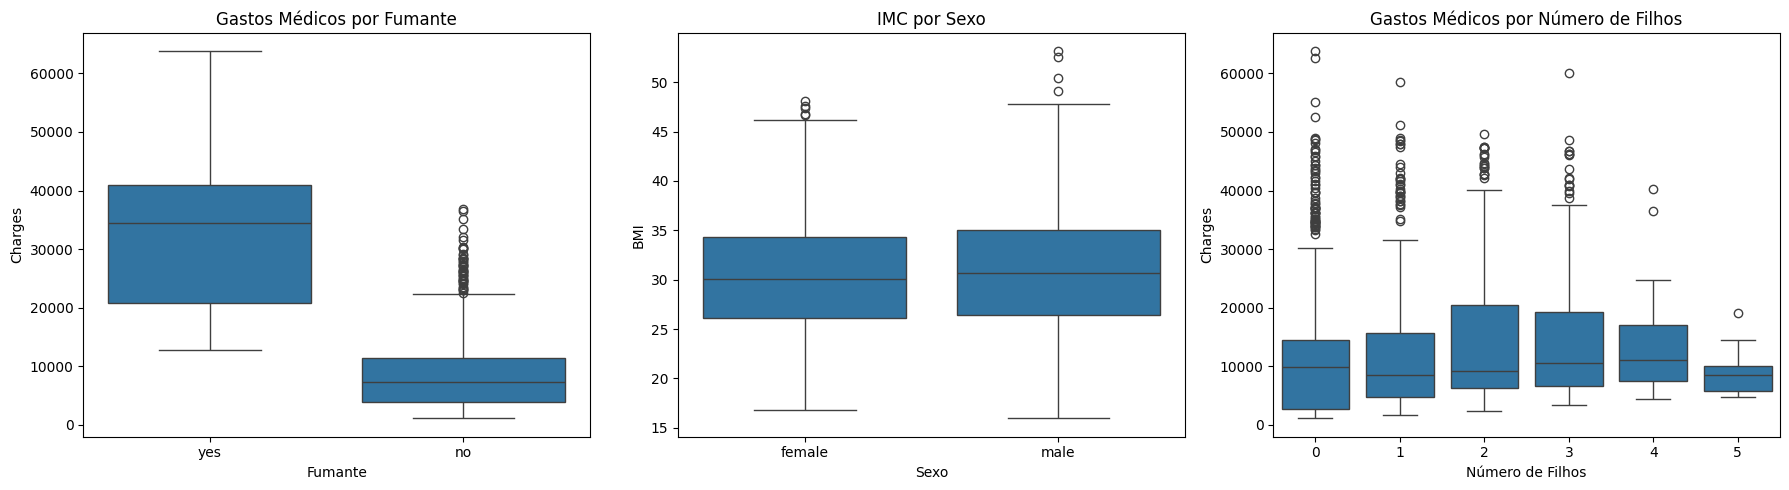

In [4]:
import seaborn as sns

plt.figure(figsize=(18, 5))

# 1. Gastos por Fumante
plt.subplot(1, 3, 1)
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Gastos Médicos por Fumante")
plt.xlabel("Fumante")
plt.ylabel("Charges")

# 2. BMI por Sexo
plt.subplot(1, 3, 2)
sns.boxplot(x="sex", y="bmi", data=df)
plt.title("IMC por Sexo")
plt.xlabel("Sexo")
plt.ylabel("BMI")

# 3. Gastos por Número de Filhos
plt.subplot(1, 3, 3)
sns.boxplot(x="children", y="charges", data=df)
plt.title("Gastos Médicos por Número de Filhos")
plt.xlabel("Número de Filhos")
plt.ylabel("Charges")

plt.tight_layout()
plt.show()


 - Fumantes vs Gastos Médicos:
   - Fumantes (Y) têm gastos médios e máximos muito mais altos.
   - Os não fumantes apresentam menor variabilidade e valores mais baixos.
   - Indica que ser fumante impacta significativamente os custos médicos.

 - Sexo vs IMC:
   - IMC é distribuído de forma semelhante entre homens e mulheres.
   - Mediana praticamente igual, com alguns outliers para ambos os sexos.
 - Número de Filhos vs Gastos Médicos:
   - Leve tendência de aumento nos gastos com mais filhos até certo ponto, mas a variação é alta em todos os grupos.
   - Gastos parecem ser mais influenciados por outros fatores (como tabagismo e idade).

### 3.3 Correlação entre Variáveis Numéricas

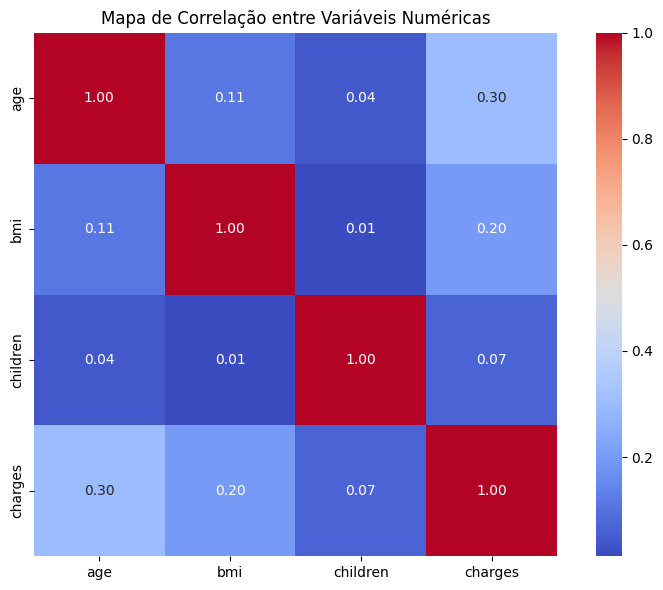

In [5]:
# Apenas variáveis numéricas
corr_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Mapa de Correlação entre Variáveis Numéricas")
plt.tight_layout()
plt.show()

 - Maior correlação com gastos (charges):
   - age: 0.30 → Correlação moderada.
   - bmi: 0.20 → Correlação fraca.
   - children: 0.07 → Correlação desprezível.
 - Conclusão: Os gastos médicos aumentam levemente com a idade e IMC, mas não são fortemente determinados apenas por variáveis numéricas.



### 3.4 Regressão Linear (Scatter Plots)

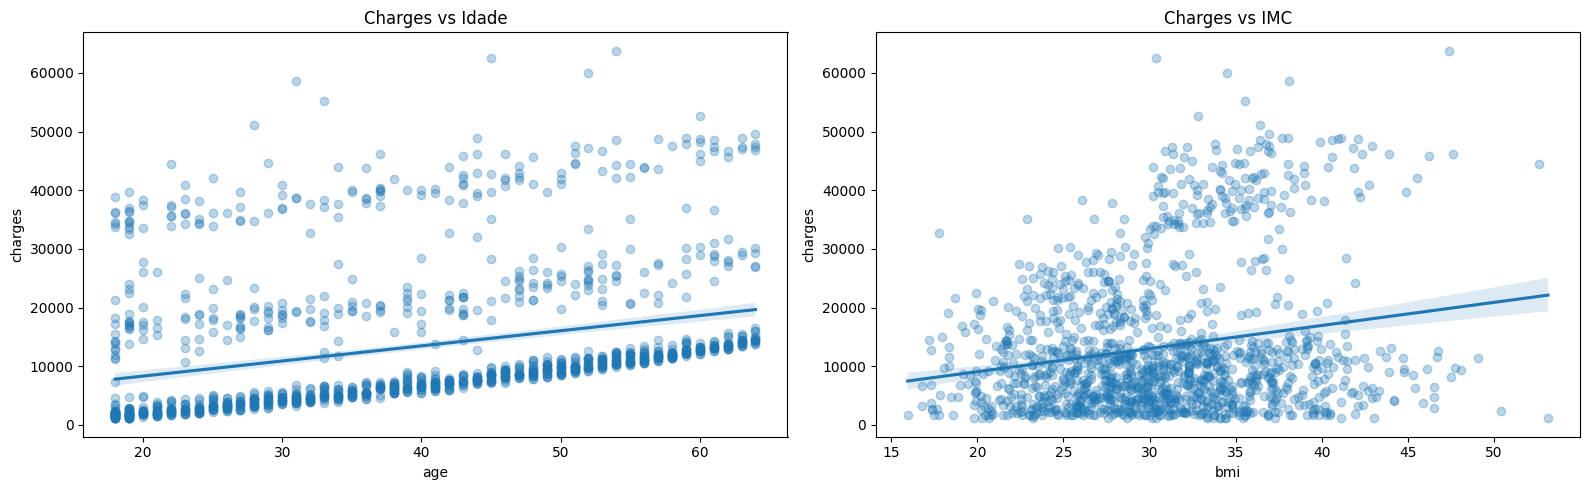

In [6]:
plt.figure(figsize=(16, 5))

# 1. Charges vs Age
plt.subplot(1, 2, 1)
sns.regplot(x="age", y="charges", data=df, scatter_kws={"alpha": 0.3})
plt.title("Charges vs Idade")

# 2. Charges vs BMI
plt.subplot(1, 2, 2)
sns.regplot(x="bmi", y="charges", data=df, scatter_kws={"alpha": 0.3})
plt.title("Charges vs IMC")

plt.tight_layout()
plt.show()


 - Gastos(charges) vs Idade(age):
   - Tendência de crescimento linear nos gastos com o aumento da idade.
   - Presença de grupos distintos: um com gastos baixos e outro com valores mais altos (possivelmente fumantes).
 - Gastos(charges) vs IMC(bmi):
   - Leve aumento nos gastos com o aumento do IMC.
   - Grande dispersão dos dados → IMC isoladamente não é bom preditor.

### 3.5 Conclusões Gerais
 - Fumante é o principal fator determinante nos custos médicos, como mostra o boxplot.
 - Idade também influencia nos gastos, com uma correlação positiva.
 - IMC tem impacto mais leve nos custos, mas pode indicar risco se muito alto.
 - Número de filhos e sexo não parecem ter grande impacto nos custos diretamente.
 - A combinação de fatores (como idade + tabagismo + IMC) provavelmente explica melhor os altos custos do que variáveis isoladas.

## 4. Pré-processamento dos dados

### 4.1 Remoção de Outliers

In [7]:
from pandas import DataFrame


def detect_outliers_iqr(data: DataFrame, columns: list[str]):
    outlier_indices = set()

    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = data[(data[column] < lower) | (data[column] > upper)]
        outlier_indices.update(outliers.index)

    return data.loc[list(outlier_indices)]

In [8]:
outliers = detect_outliers_iqr(df, ["age", "bmi", "charges", "children"])
outliers

,age,sex,bmi,children,smoker,region,charges
1031,55,female,35.200,0,yes,southeast,44423.80300
524,42,male,26.070,1,yes,southeast,38245.59327
1036,22,male,37.070,2,yes,southeast,37484.44930
14,27,male,42.130,0,yes,southeast,39611.75770
1037,45,female,30.495,1,yes,northwest,39725.51805
...,...,...,...,...,...,...,...
488,44,female,38.060,0,yes,southeast,48885.13561
500,29,male,34.400,0,yes,southwest,36197.69900
1012,61,female,33.330,4,no,southeast,36580.28216
1021,22,female,31.020,3,yes,southeast,35595.58980


In [9]:
df_clean = df.drop(outliers.index)
df, df_clean

(      age     sex     bmi  children smoker     region      charges
 0      19  female  27.900         0    yes  southwest  16884.92400
 1      18    male  33.770         1     no  southeast   1725.55230
 2      28    male  33.000         3     no  southeast   4449.46200
 3      33    male  22.705         0     no  northwest  21984.47061
 4      32    male  28.880         0     no  northwest   3866.85520
 ...   ...     ...     ...       ...    ...        ...          ...
 1333   50    male  30.970         3     no  northwest  10600.54830
 1334   18  female  31.920         0     no  northeast   2205.98080
 1335   18  female  36.850         0     no  southeast   1629.83350
 1336   21  female  25.800         0     no  southwest   2007.94500
 1337   61  female  29.070         0    yes  northwest  29141.36030
 
 [1338 rows x 7 columns],
       age     sex     bmi  children smoker     region      charges
 0      19  female  27.900         0    yes  southwest  16884.92400
 1      18    male  

### 4.2 Normalização

In [10]:
df_encoded = pd.get_dummies(df_clean, columns=["sex", "smoker", "region"], drop_first=True)
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

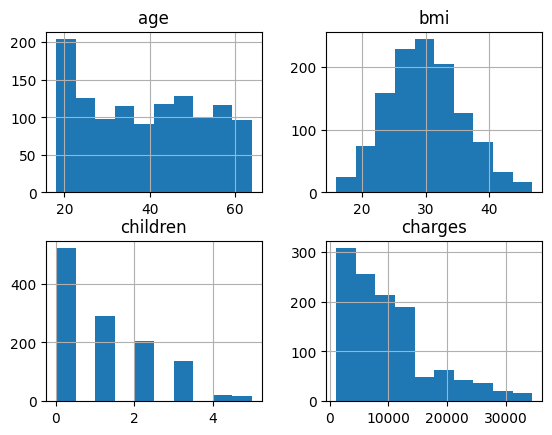

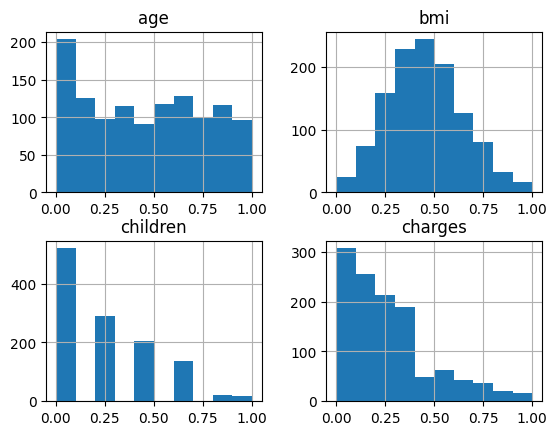

In [11]:
columns = ["age", "bmi", "children", "charges"]

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_clean[columns].values)
df_normalized = pd.DataFrame(x_scaled, columns=columns, index=df_clean.index)

df_clean.hist()
df_normalized.hist()

In [12]:
dataset = pd.concat([df_encoded[["sex_male", "smoker_yes", "region_northwest", "region_southeast", "region_southwest"]], df_normalized], axis=1)
dataset

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,False,True,False,False,True,0.021739,0.387788,0.0,0.472641
1,True,False,False,True,False,0.000000,0.578435,0.2,0.018101
2,True,False,False,True,False,0.217391,0.553426,0.6,0.099775
3,True,False,True,False,False,0.326087,0.219065,0.0,0.625547
4,True,False,True,False,False,0.304348,0.419617,0.0,0.082306
...,...,...,...,...,...,...,...,...,...
1333,True,False,True,False,False,0.695652,0.487496,0.6,0.284210
1334,False,False,False,False,False,0.000000,0.518350,0.0,0.032506
1335,False,False,False,True,False,0.000000,0.678467,0.0,0.015231
1336,False,False,False,False,True,0.065217,0.319584,0.0,0.026568


In [13]:
x = dataset.drop('charges', axis=1)
y = dataset['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 5. Treinando os modelos

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R²": r2_score(y_test, y_pred)
    }

In [15]:
results_df = pd.DataFrame(results).T
print("Comparação de Modelos:")
results_df.sort_values(by="R²", ascending=False).round(2)

Comparação de Modelos:


,MAE,RMSE,R²
Linear Regression,0.08,0.13,0.60
Random Forest,0.08,0.14,0.56
Decision Tree,0.10,0.21,-0.03


## 6. Interpretanto os resultados
 - Linear Regression tem o melhor R² (0.60), o menor RMSE (0.13), e MAE empatado com Random Forest (0.08). Isso indica que está explicando bem a variabilidade dos dados e fazendo previsões próximas dos valores reais.
 - Random Forest também teve bom desempenho, mas com R² levemente inferior (0.56) e RMSE um pouco maior.
 - Decision Tree teve o pior desempenho: R² negativo e erros mais altos, mostrando que o modelo não conseguiu generalizar bem.

## 7. Conclusão:
O melhor modelo é a Regressão Linear, pois:
 - Tem o maior R² (melhor poder explicativo),
 - O menor erro quadrático (RMSE),
 - E um MAE muito baixo (iguais a Random Forest).

## 8. Salvando o modelo

In [16]:
import pickle
import os

model = {"name": "Sample Model", "version": 1.0}

folder_path = "saved_models"
file_name = "model.pkl"
file_path = os.path.join(folder_path, file_name)

os.makedirs(folder_path, exist_ok=True)

with open(file_path, "wb") as file:
    pickle.dump(models["Linear Regression"], file)

print(f"Salvando o pipeline de modelagem (pickle) em: {file_path}")

Salvando o pipeline de modelagem (pickle) em: saved_models\model.pkl
